In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from methylation_utils.methylation_utils.analyzer import MethylationAnalyzerHelper
from methylation_utils.methylation_utils.plot import MethPlot
import pyarrow
import pyarrow.feather as feather

In [3]:
ALL_SAMPLES_FILE = "data/old_data/runAll.sh.samples"

METH_DYNAMIC_FOLDER = "data/old_data/bottom/samples_meth_dynamic"
METH_REF_FILE = "data/old_data/parse450K.pl.order.lookup"

In [4]:
windows_to_analyze = feather.read_feather(
    "shared_data/windows_to_analyze.cancer.feather"
)

In [5]:
windows_to_analyze["window name"] = (
    windows_to_analyze["chrom"]
    + ":"
    + windows_to_analyze["start"].astype(str)
    + "-"
    + windows_to_analyze["end"].astype(str)
)

In [6]:
windows_to_analyze

index chrom      start        end  length CpG_chrm  chrom_num  \
0        3  chr1     910429     924641   14212     chr1          1   
4      149  chr1    3024260    3084437   60177     chr1          1   
6      204  chr1    3533662    3579462   45800     chr1          1   
8      463  chr1   18684521   18875365  190844     chr1          1   
9      556  chr1   24931074   25067262  136188     chr1          1   
..     ...   ...        ...        ...     ...      ...        ...   
138  15709  chr8   11679041   11703773   24732     chr8          8   
140  16054  chr8   98947373   99859902  912529     chr8          8   
142  16267  chr8  143183416  143248530   65114     chr8          8   
143  16722  chr9  135500901  135804653  303752     chr9          9   
144  16803  chr9  137435117  137465024   29907     chr9          9   

     count_in_window coverage_percentage  intermediate_percent  dist_to_next  \
0                 23  0.9721059223474683              0.625000     1488917.0   
4                 40  0.9081625433074708              0.634146       55150.0   
6                 21  0.9539062118772264              0.636364    13665938.0   
8                 24  0.9119062565390249              0.600000     6055709.0   
9                 33  0.9310898223204782              0.647059    22366277.0   
..               ...                 ...                   ...           ...   
138               24  0.9291503046397529              0.640000    42754095.0   
140               23  0.8825519947381552              0.625000    42230004.0   
142               23  0.8875442379249797              0.625000           NaN   
143               45  0.8632304673407073              0.608696     1630464.0   
144               21  0.9711349384025241              0.636364           NaN   

                  window name  
0          chr1:910429-924641  
4        chr1:3024260-3084437  
6        chr1:3533662-3579462  
8      chr1:18684521-18875365  
9      chr1:24931074-25067262  
..                        ...  
138    chr8:11679041-11703773  
140    chr8:98947373-99859902  
142  chr8:143183416-143248530  
143  chr9:135500901-135804653  
144  chr9:137435117-137465024  

[98 rows x 12 columns]

In [7]:
all_samples = feather.read_feather("shared_data/all_samples.feather")

In [8]:
all_sample_info = pd.read_csv(ALL_SAMPLES_FILE, sep="\t")

In [9]:
all_samples_copy = all_sample_info.set_index("sample")
all_samples_copy = all_samples_copy[
    [
        "sample_type",
        "project_descriptor",
    ]
].sort_values(
    by=[
        "sample_type",
        "project_descriptor",
    ]
)

In [10]:
windows_to_analyze.reset_index(drop=True, inplace=True)

In [11]:
windows_to_analyze

index chrom      start        end  length CpG_chrm  chrom_num  \
0       3  chr1     910429     924641   14212     chr1          1   
1     149  chr1    3024260    3084437   60177     chr1          1   
2     204  chr1    3533662    3579462   45800     chr1          1   
3     463  chr1   18684521   18875365  190844     chr1          1   
4     556  chr1   24931074   25067262  136188     chr1          1   
..    ...   ...        ...        ...     ...      ...        ...   
93  15709  chr8   11679041   11703773   24732     chr8          8   
94  16054  chr8   98947373   99859902  912529     chr8          8   
95  16267  chr8  143183416  143248530   65114     chr8          8   
96  16722  chr9  135500901  135804653  303752     chr9          9   
97  16803  chr9  137435117  137465024   29907     chr9          9   

    count_in_window coverage_percentage  intermediate_percent  dist_to_next  \
0                23  0.9721059223474683              0.625000     1488917.0   
1                40  0.9081625433074708              0.634146       55150.0   
2                21  0.9539062118772264              0.636364    13665938.0   
3                24  0.9119062565390249              0.600000     6055709.0   
4                33  0.9310898223204782              0.647059    22366277.0   
..              ...                 ...                   ...           ...   
93               24  0.9291503046397529              0.640000    42754095.0   
94               23  0.8825519947381552              0.625000    42230004.0   
95               23  0.8875442379249797              0.625000           NaN   
96               45  0.8632304673407073              0.608696     1630464.0   
97               21  0.9711349384025241              0.636364           NaN   

                 window name  
0         chr1:910429-924641  
1       chr1:3024260-3084437  
2       chr1:3533662-3579462  
3     chr1:18684521-18875365  
4     chr1:24931074-25067262  
..                       ...  
93    chr8:11679041-11703773  
94    chr8:98947373-99859902  
95  chr8:143183416-143248530  
96  chr9:135500901-135804653  
97  chr9:137435117-137465024  

[98 rows x 12 columns]

In [12]:
all_samples_copy

sample_type  \
sample                                       
TCGA-DV-A4W0-05A  Additional - New Primary   
TCGA-UZ-A9PS-05A  Additional - New Primary   
TCGA-P7-A5NY-05A  Additional - New Primary   
TCGA-SR-A6MX-05A  Additional - New Primary   
TCGA-QR-A6GZ-05A  Additional - New Primary   
...                                    ...   
TCGA-BG-A3EW-11A       Solid Tissue Normal   
TCGA-AJ-A3NH-11A       Solid Tissue Normal   
TCGA-BG-A3PP-11A       Solid Tissue Normal   
TCGA-DI-A2QU-11A       Solid Tissue Normal   
TCGA-DI-A2QY-11A       Solid Tissue Normal   

                                     project_descriptor  
sample                                                   
TCGA-DV-A4W0-05A      Kidney renal clear cell carcinoma  
TCGA-UZ-A9PS-05A  Kidney renal papillary cell carcinoma  
TCGA-P7-A5NY-05A     Pheochromocytoma and Paraganglioma  
TCGA-SR-A6MX-05A     Pheochromocytoma and Paraganglioma  
TCGA-QR-A6GZ-05A     Pheochromocytoma and Paraganglioma  
...                                                 ...  
TCGA-BG-A3EW-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-AJ-A3NH-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-BG-A3PP-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-DI-A2QU-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-DI-A2QY-11A   Uterine Corpus Endometrial Carcinoma  

[9714 rows x 2 columns]

In [13]:
def populate_window_averages(windows, all_samples):
    all_samples_windows_average = []

    for i, row in windows.iterrows():
        chrom = row["chrom"]
        start = row["start"]
        end = row["end"]
        average_methylation = (
            all_samples[
                (all_samples["CpG_chrm"] == chrom)
                & (all_samples["CpG_beg"] >= start)
                & (all_samples["CpG_beg"] <= end)
            ]
            .drop(["CpG_chrm", "CpG_beg", "chrom_num"], axis=1)
            .mean(axis=0)
            .to_frame()
            .transpose()
        )
        all_samples_windows_average.append(list(average_methylation.values[0]))
    return all_samples_windows_average

In [14]:
all_samples_windows_average = populate_window_averages(windows_to_analyze, all_samples)
all_samples_windows_average_df = pd.DataFrame(
    all_samples_windows_average,
    columns=all_samples.drop(["CpG_chrm", "CpG_beg", "chrom_num"], axis=1).columns,
)

In [15]:
all_samples_windows_average_df

TCGA-EX-A1H6-01B  TCGA-C5-A7CM-01A  TCGA-C5-A2M1-01A  TCGA-LP-A5U2-01A  \
0          56.200000         43.457143         45.114286         35.714286   
1          59.037500         56.101266         58.500000         69.814815   
2          76.357143         61.904762         70.142857         57.976190   
3          80.090909         61.111111         63.481481         70.963636   
4          71.272727         68.381818         69.454545         66.345455   
..               ...               ...               ...               ...   
93         63.611111         50.150943         50.685185         62.259259   
94         64.203125         62.213115         62.969231         58.158730   
95         55.132075         47.584906         47.339623         49.698113   
96         75.726415         64.009434         66.320755         69.066038   
97         62.125000         49.050000         56.600000         50.125000   

    TCGA-EK-A3GK-01A  TCGA-Q1-A73P-01A  TCGA-UC-A7PI-01A  TCGA-JX-A3Q8-01A  \
0          37.314286         55.000000         46.685714         50.628571   
1          48.687500         63.443038         63.202532         56.169014   
2          65.571429         74.571429         67.428571         85.447368   
3          51.218182         77.500000         80.192308         73.945455   
4          69.800000         72.927273         75.509091         73.636364   
..               ...               ...               ...               ...   
93         47.735849         60.882353         57.326923         64.925926   
94         61.075758         63.734375         69.894737         69.671875   
95         38.641509         54.653846         54.826923         50.301887   
96         52.447619         75.288462         74.628571         63.771429   
97         55.875000         58.400000         58.050000         60.950000   

    TCGA-EA-A556-01A  TCGA-C5-A1ME-01A  ...  TCGA-EW-A1P1-01A  \
0          42.114286         53.771429  ...         48.914286   
1          26.924051         61.000000  ...         50.617284   
2          72.571429         76.809524  ...         71.452381   
3          43.962963         77.490909  ...         67.981481   
4          66.272727         77.592593  ...         62.563636   
..               ...               ...  ...               ...   
93         16.641509         59.792453  ...         28.092593   
94         69.242424         67.555556  ...         61.707692   
95         26.377358         57.905660  ...         54.830189   
96         55.764151         71.423077  ...         69.462264   
97         53.075000         61.666667  ...         61.075000   

    TCGA-OL-A66L-01A  TCGA-AR-A0TR-01A  TCGA-BH-A0HA-01A  TCGA-BH-A1ES-06A  \
0          50.971429         46.714286         53.114286         44.428571   
1          50.846154         36.012821         41.243590         37.775000   
2          68.928571         62.952381         68.214286         66.500000   
3          71.307692         69.784314         72.264151         68.425926   
4          67.981818         77.709091         63.381818         65.890909   
..               ...               ...               ...               ...   
93         42.816327         39.571429         34.735849         56.685185   
94         61.322034         58.037037         67.950820         68.369231   
95         54.826923         53.780000         53.941176         42.320755   
96         69.173077         56.971429         67.632075         67.457143   
97         62.897436         64.675000         65.150000         60.487179   

    TCGA-E2-A15J-01A  TCGA-B6-A40C-01A  TCGA-BH-A0B3-11B  TCGA-E9-A1QZ-01A  \
0          46.628571         43.371429         46.142857         49.371429   
1          54.410256         46.864198         47.153846         42.275000   
2          63.714286         66.000000         68.476190         66.285714   
3          69.716981         70.207547         70.339623         62.781818   
4          75.018182  

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
# import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data.keys()

# Check the output classes
print(data["target_names"])

# Check the input attributes
print(data["feature_names"])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
# construct a dataframe using pandas
# df1 = pd.DataFrame(data["data"], columns=data["feature_names"])

# Scale data before applying PCA
scaling = StandardScaler()

# Use fit and transform method
scaling.fit(all_samples_windows_average_df.transpose())
Scaled_data = scaling.transform(all_samples_windows_average_df.transpose())

# Set the n_components=3
principal = PCA(n_components=3)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

(9714, 3)


In [19]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-0.10158577, -0.12123507, -0.10799456, -0.12513751, -0.10702584,
        -0.07378271, -0.05739834, -0.07992588, -0.06402885, -0.09917454,
        -0.0628118 , -0.12693571, -0.08860614, -0.09202012, -0.12085737,
        -0.0732972 , -0.10344004, -0.10952694, -0.09905989, -0.06639274,
        -0.08480957, -0.08859067, -0.0944088 , -0.11048456, -0.10613832,
        -0.1176422 , -0.11635984, -0.1255904 , -0.09958859, -0.10167637,
        -0.11167365, -0.08148137, -0.12625419, -0.11555816, -0.12727603,
        -0.10112471, -0.11991183, -0.11438179, -0.12121542, -0.10385415,
        -0.10659449, -0.12649137, -0.12101954, -0.13635974, -0.07064844,
        -0.13004807, -0.11756401, -0.05496648, -0.1261596 , -0.10626482,
        -0.13626712, -0.1165783 , -0.13158564, -0.12964439, -0.08879922,
        -0.06251828, -0.11204853, -0.09172672, -0.08613807, -0.06968692,
        -0.07579299, -0.10804225, -0.08102476, -0.08552383, -0.12689074,
        -0.07820991, -0.006903  , -0.09961068, -0.1

In [20]:
len(x[:,0])

9714

In [21]:
colors = ["type1", "type2", "type3"]

In [22]:
all_samples_copy

sample_type  \
sample                                       
TCGA-DV-A4W0-05A  Additional - New Primary   
TCGA-UZ-A9PS-05A  Additional - New Primary   
TCGA-P7-A5NY-05A  Additional - New Primary   
TCGA-SR-A6MX-05A  Additional - New Primary   
TCGA-QR-A6GZ-05A  Additional - New Primary   
...                                    ...   
TCGA-BG-A3EW-11A       Solid Tissue Normal   
TCGA-AJ-A3NH-11A       Solid Tissue Normal   
TCGA-BG-A3PP-11A       Solid Tissue Normal   
TCGA-DI-A2QU-11A       Solid Tissue Normal   
TCGA-DI-A2QY-11A       Solid Tissue Normal   

                                     project_descriptor  
sample                                                   
TCGA-DV-A4W0-05A      Kidney renal clear cell carcinoma  
TCGA-UZ-A9PS-05A  Kidney renal papillary cell carcinoma  
TCGA-P7-A5NY-05A     Pheochromocytoma and Paraganglioma  
TCGA-SR-A6MX-05A     Pheochromocytoma and Paraganglioma  
TCGA-QR-A6GZ-05A     Pheochromocytoma and Paraganglioma  
...                                                 ...  
TCGA-BG-A3EW-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-AJ-A3NH-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-BG-A3PP-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-DI-A2QU-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-DI-A2QY-11A   Uterine Corpus Endometrial Carcinoma  

[9714 rows x 2 columns]

In [23]:
sample_type_id = {
    sample_type: i
    for i, sample_type in enumerate(all_samples_copy["sample_type"].unique())
}
project_descriptor_id = {
    project_descriptor : i
    for i, project_descriptor in enumerate(
        all_samples_copy["project_descriptor"].unique()
    )
}

In [24]:
sample_type_id

{'Additional - New Primary': 0,
 'Additional Metastatic': 1,
 'Metastatic': 2,
 'Primary Blood Derived Cancer - Bone Marrow': 3,
 'Primary Blood Derived Cancer - Peripheral Blood': 4,
 'Primary Tumor': 5,
 'Recurrent Blood Derived Cancer - Bone Marrow': 6,
 'Recurrent Blood Derived Cancer - Peripheral Blood': 7,
 'Recurrent Tumor': 8,
 'Solid Tissue Normal': 9}

In [25]:
project_descriptor_id

{'Kidney renal clear cell carcinoma': 0,
 'Kidney renal papillary cell carcinoma': 1,
 'Pheochromocytoma and Paraganglioma': 2,
 'Testicular Germ Cell Tumors': 3,
 'Skin Cutaneous Melanoma': 4,
 'Breast invasive carcinoma': 5,
 'Cervical squamous cell carcinoma and endocervical adenocarcinoma': 6,
 'Colon adenocarcinoma': 7,
 'Esophageal carcinoma': 8,
 'Head and Neck squamous cell carcinoma': 9,
 'Pancreatic adenocarcinoma': 10,
 'Prostate adenocarcinoma': 11,
 'Sarcoma': 12,
 'Thyroid carcinoma': 13,
 nan: 14,
 'Acute Myeloid Leukemia': 15,
 'Adrenocortical carcinoma': 16,
 'Bladder Urothelial Carcinoma': 17,
 'Brain Lower Grade Glioma': 18,
 'Cholangiocarcinoma': 19,
 'Glioblastoma multiforme': 20,
 'Kidney Chromophobe': 21,
 'Liver hepatocellular carcinoma': 22,
 'Lung adenocarcinoma': 23,
 'Lung squamous cell carcinoma': 24,
 'Lymphoid Neoplasm Diffuse Large B-cell Lymphoma': 25,
 'Mesothelioma': 26,
 'Ovarian serous cystadenocarcinoma': 27,
 'Rectum adenocarcinoma': 28,
 'Stomach

In [26]:
all_samples_copy["project_color_id"] = all_samples_copy["project_descriptor"].apply(
    lambda x: project_descriptor_id[x]
)
all_samples_copy["sample_color_id"] = all_samples_copy["sample_type"].apply(
    lambda x: sample_type_id[x]
)
all_samples_copy

sample_type  \
sample                                       
TCGA-DV-A4W0-05A  Additional - New Primary   
TCGA-UZ-A9PS-05A  Additional - New Primary   
TCGA-P7-A5NY-05A  Additional - New Primary   
TCGA-SR-A6MX-05A  Additional - New Primary   
TCGA-QR-A6GZ-05A  Additional - New Primary   
...                                    ...   
TCGA-BG-A3EW-11A       Solid Tissue Normal   
TCGA-AJ-A3NH-11A       Solid Tissue Normal   
TCGA-BG-A3PP-11A       Solid Tissue Normal   
TCGA-DI-A2QU-11A       Solid Tissue Normal   
TCGA-DI-A2QY-11A       Solid Tissue Normal   

                                     project_descriptor  project_color_id  \
sample                                                                      
TCGA-DV-A4W0-05A      Kidney renal clear cell carcinoma                 0   
TCGA-UZ-A9PS-05A  Kidney renal papillary cell carcinoma                 1   
TCGA-P7-A5NY-05A     Pheochromocytoma and Paraganglioma                 2   
TCGA-SR-A6MX-05A     Pheochromocytoma and Paraganglioma                 2   
TCGA-QR-A6GZ-05A     Pheochromocytoma and Paraganglioma                 2   
...                                                 ...               ...   
TCGA-BG-A3EW-11A   Uterine Corpus Endometrial Carcinoma                32   
TCGA-AJ-A3NH-11A   Uterine Corpus Endometrial Carcinoma                32   
TCGA-BG-A3PP-11A   Uterine Corpus Endometrial Carcinoma                32   
TCGA-DI-A2QU-11A   Uterine Corpus Endometrial Carcinoma                32   
TCGA-DI-A2QY-11A   Uterine Corpus Endometrial Carcinoma                32   

                  sample_color_id  
sample                             
TCGA-DV-A4W0-05A                0  
TCGA-UZ-A9PS-05A                0  
TCGA-P7-A5NY-05A                0  
TCGA-SR-A6MX-05A                0  
TCGA-QR-A6GZ-05A                0  
...                           ...  
TCGA-BG-A3EW-11A                9  
TCGA-AJ-A3NH-11A                9  
TCGA-BG-A3PP-11A                9  
TCGA-DI-A2QU-11A                9  
TCGA-DI-A2QY-11A                9  

[9714 rows x 4 columns]

Text(0, 0.5, 'pc2')

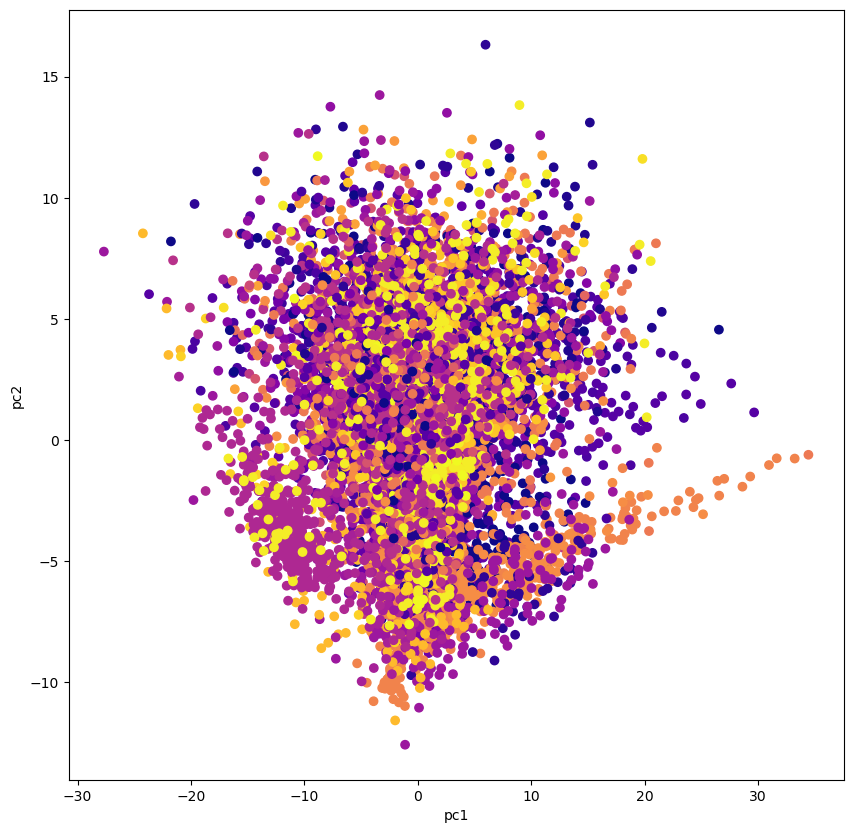

In [27]:
plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c=all_samples_copy["project_color_id"], cmap="plasma")
plt.xlabel("pc1")
plt.ylabel("pc2")

In [28]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Text(0.5, 0, 'PC3')

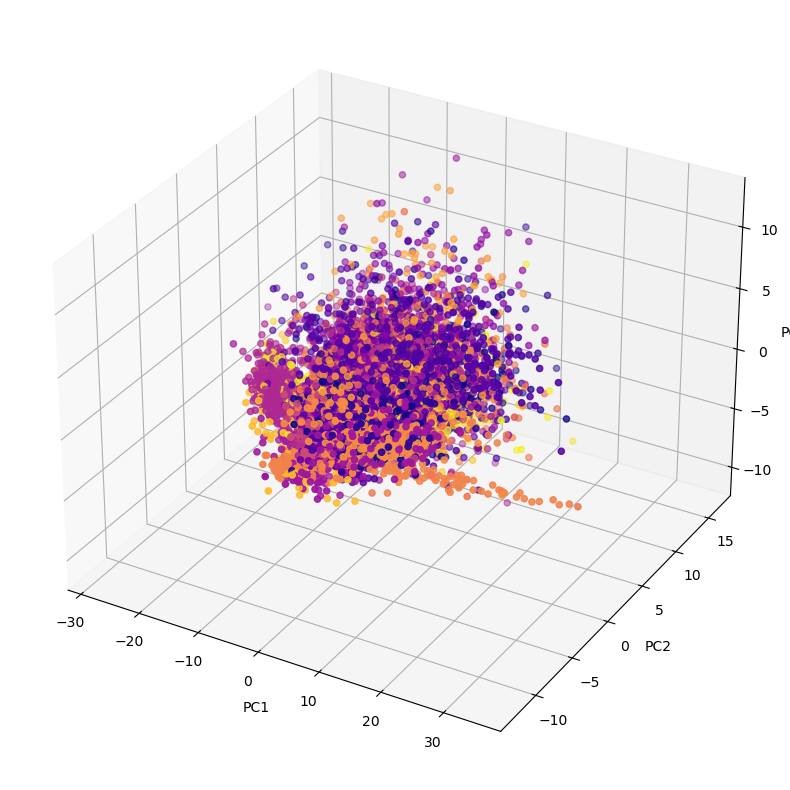

In [29]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection="3d")

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(
    x[:, 0], x[:, 1], x[:, 2], c=all_samples_copy["project_color_id"], cmap="plasma"
)
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [30]:
#Try TSNE and UMAP

In [31]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap

In [32]:
pendigits = sklearn.datasets.load_digits()
mnist = sklearn.datasets.fetch_openml("mnist_784")
fmnist = sklearn.datasets.fetch_openml("Fashion-MNIST")

/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different dat

In [33]:
pendigits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [34]:
mapper = umap.UMAP().fit(all_samples_windows_average_df.dropna().transpose())

In [35]:
import umap.plot

/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [36]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [58]:
import plotly.express as px
import pandas as pd

# Assuming all_samples_windows_average_df and all_samples_copy are your dataframes

# Obtain the embedding
embedding = mapper.embedding_

# Prepare a DataFrame for plotting. Make sure the lengths match.
plot_df = pd.DataFrame(embedding, columns=["UMAP-1", "UMAP-2"])
plot_df["Label"] = all_samples_copy["project_descriptor"].fillna("None").values

# Create an interactive plot using Plotly Express
fig = px.scatter(
    plot_df,
    x="UMAP-1",
    y="UMAP-2",
    color="Label",
    width=2500,
    height=1000,
    hover_data=["Label"],  # Ensure label is shown on hover
)

fig.update_traces(marker=dict(size=15))
fig.show()

/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

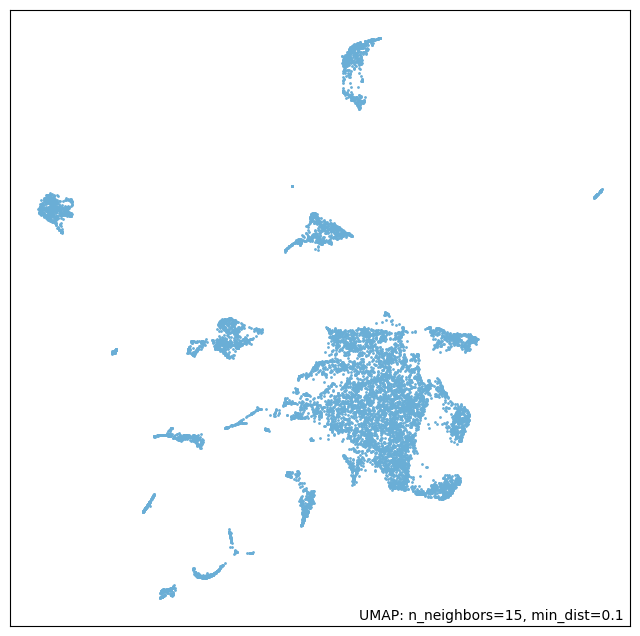

In [37]:
umap.plot.points(mapper)

In [38]:
all_samples_copy["project_color_id"]

sample
TCGA-DV-A4W0-05A     0
TCGA-UZ-A9PS-05A     1
TCGA-P7-A5NY-05A     2
TCGA-SR-A6MX-05A     2
TCGA-QR-A6GZ-05A     2
                    ..
TCGA-BG-A3EW-11A    32
TCGA-AJ-A3NH-11A    32
TCGA-BG-A3PP-11A    32
TCGA-DI-A2QU-11A    32
TCGA-DI-A2QY-11A    32
Name: project_color_id, Length: 9714, dtype: int64

In [39]:
all_samples_windows_average_df.transpose()

0          1          2          3          4   \
TCGA-EX-A1H6-01B  56.200000  59.037500  76.357143  80.090909  71.272727   
TCGA-C5-A7CM-01A  43.457143  56.101266  61.904762  61.111111  68.381818   
TCGA-C5-A2M1-01A  45.114286  58.500000  70.142857  63.481481  69.454545   
TCGA-LP-A5U2-01A  35.714286  69.814815  57.976190  70.963636  66.345455   
TCGA-EK-A3GK-01A  37.314286  48.687500  65.571429  51.218182  69.800000   
...                     ...        ...        ...        ...        ...   
TCGA-E2-A15J-01A  46.628571  54.410256  63.714286  69.716981  75.018182   
TCGA-B6-A40C-01A  43.371429  46.864198  66.000000  70.207547  65.418182   
TCGA-BH-A0B3-11B  46.142857  47.153846  68.476190  70.339623  67.909091   
TCGA-E9-A1QZ-01A  49.371429  42.275000  66.285714  62.781818  56.745455   
TCGA-S3-AA10-01A  34.800000  52.187500  60.829268  55.781818  40.927273   

                         5          6          7          8          9   ...  \
TCGA-EX-A1H6-01B  53.216495  63.279070  69.759740  56.405405  73.666667  ...   
TCGA-C5-A7CM-01A  48.336735  58.593023  59.576923  42.513514  72.308824  ...   
TCGA-C5-A2M1-01A  49.353535  62.470588  58.057692  53.783784  69.188406  ...   
TCGA-LP-A5U2-01A  49.141414  74.988372  72.070968  40.783784  85.000000  ...   
TCGA-EK-A3GK-01A  50.721649  67.270588  56.070968  39.513514  62.420290  ...   
...                     ...        ...        ...        ...        ...  ...   
TCGA-E2-A15J-01A  46.377551  56.129412  46.955128  40.243243  78.470588  ...   
TCGA-B6-A40C-01A  46.123711  57.647059  30.774194  43.810811  63.132353  ...   
TCGA-BH-A0B3-11B  32.854167  25.814815  69.570423  53.054054  72.645161  ...   
TCGA-E9-A1QZ-01A  36.373737  33.141176  46.743590  55.189189  56.724638  ...   
TCGA-S3-AA10-01A  33.193878  38.616279  38.305195  57.081081  53.296875  ...   

                         88         89         90         91         92  \
TCGA-EX-A1H6-01B  78.828571  63.277778  61.087209  55.310345  56.718182   
TCGA-C5-A7CM-01A  65.588235  61.553571  47.290698  56.896552  52.691589   
TCGA-C5-A2M1-01A  64.852941  60.962963  61.304094  51.262069  56.800000   
TCGA-LP-A5U2-01A  63.558824  65.945455  57.789474  58.944828  48.747748   
TCGA-EK-A3GK-01A  54.500000  53.982143  49.652941  43.269504  40.417476   
...                     ...        ...        ...        ...        ...   
TCGA-E2-A15J-01A  68.529412  64.907407  55.347059  59.531034  54.308411   
TCGA-B6-A40C-01A  59.617647  55.490909  57.694118  63.902098  51.220183   
TCGA-BH-A0B3-11B  74.257143  34.980769  40.466258  60.122302  51.254902   
TCGA-E9-A1QZ-01A  59.117647  35.357143  39.158824  59.684932  50.486726   
TCGA-S3-AA10-01A  45.285714  45.518519  35.565476  49.857143  51.794393   

                         93         94         95         96      97  
TCGA-EX-A1H6-01B  63.611111  64.203125  55.132075  75.726415  62.125  
TCGA-C5-A7CM-01A  50.150943  62.213115  47.584906  64.009434  49.050  
TCGA-C5-A2M1-01A  50.685185  62.969231  47.339623  66.320755  56.600  
TCGA-LP-A5U2-01A  62.259259  58.158730  49.698113  69.066038  50.125  
TCGA-EK-A3GK-01A  47.735849  61.075758  38.641509  52.447619  55.875  
...                     ...        ...        ...        ...     ...  
TCGA-E2-A15J-01A  33.770833  64.846154  51.980769  63.295238  63.325  
TCGA-B6-A40C-01A  35.039216  66.378788  50.849057  60.180952  61.100  
TCGA-BH-A0B3-11B  20.020408  57.152542  52.615385  68.144231  61.000  
TCGA-E9-A1QZ-01A  23.500000  60.538462  50.403846  59.556604  59.400  
TCGA-S3-AA10-01A  28.132075  63.344262  40.557692  49.466667  50.650  

[9714 rows x 98 columns]

In [40]:
all_samples_copy[["project_descriptor", "project_color_id"]].drop_duplicates(
    keep="first"
).reset_index(drop=True)
# Replace NaN in project_descriptor with "None"
all_samples_copy["project_descriptor"].fillna("None")

sample
TCGA-DV-A4W0-05A        Kidney renal clear cell carcinoma
TCGA-UZ-A9PS-05A    Kidney renal papillary cell carcinoma
TCGA-P7-A5NY-05A       Pheochromocytoma and Paraganglioma
TCGA-SR-A6MX-05A       Pheochromocytoma and Paraganglioma
TCGA-QR-A6GZ-05A       Pheochromocytoma and Paraganglioma
                                    ...                  
TCGA-BG-A3EW-11A     Uterine Corpus Endometrial Carcinoma
TCGA-AJ-A3NH-11A     Uterine Corpus Endometrial Carcinoma
TCGA-BG-A3PP-11A     Uterine Corpus Endometrial Carcinoma
TCGA-DI-A2QU-11A     Uterine Corpus Endometrial Carcinoma
TCGA-DI-A2QY-11A     Uterine Corpus Endometrial Carcinoma
Name: project_descriptor, Length: 9714, dtype: object

<Axes: >

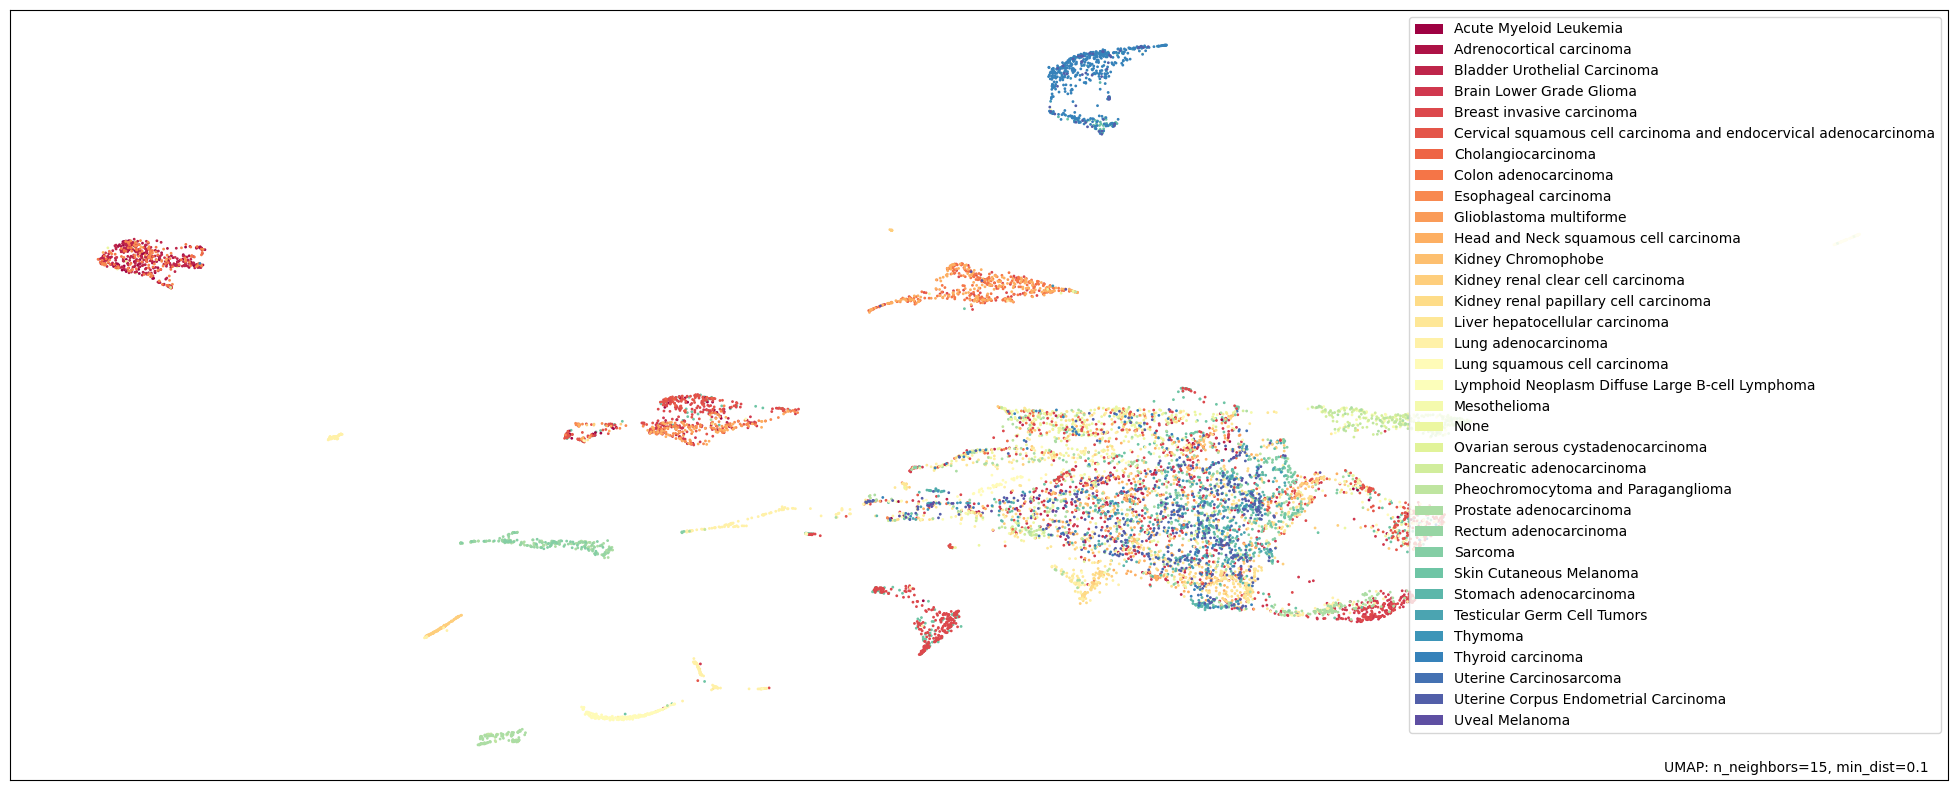

In [41]:
umap.plot.points(mapper, labels=all_samples_copy["project_descriptor"].fillna("None"), width=2500, height=1000)

<Axes: >

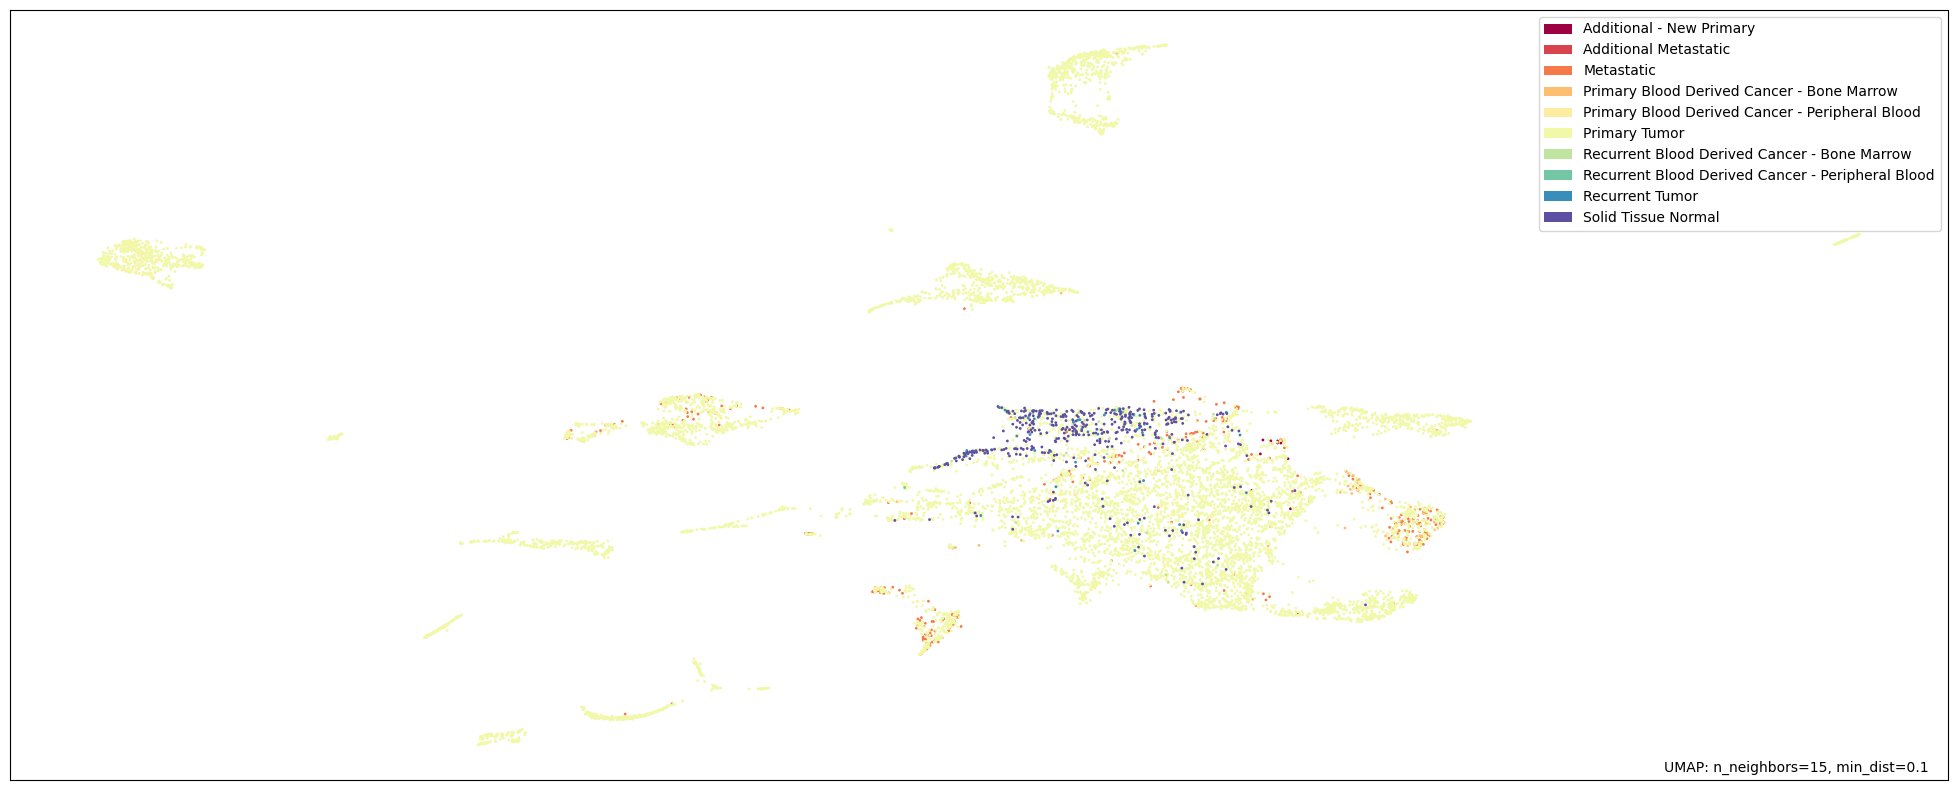

In [42]:
umap.plot.points(
    mapper,
    labels=all_samples_copy["sample_type"].fillna("None"),
    width=2500,
    height=1000,
)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

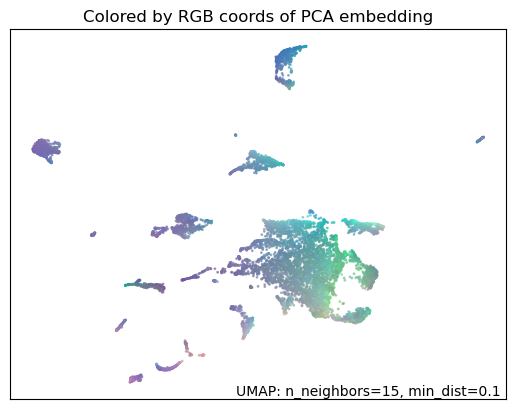

In [43]:
umap.plot.diagnostic(mapper, diagnostic_type="pca", width=2500, height=1000)

<Axes: >

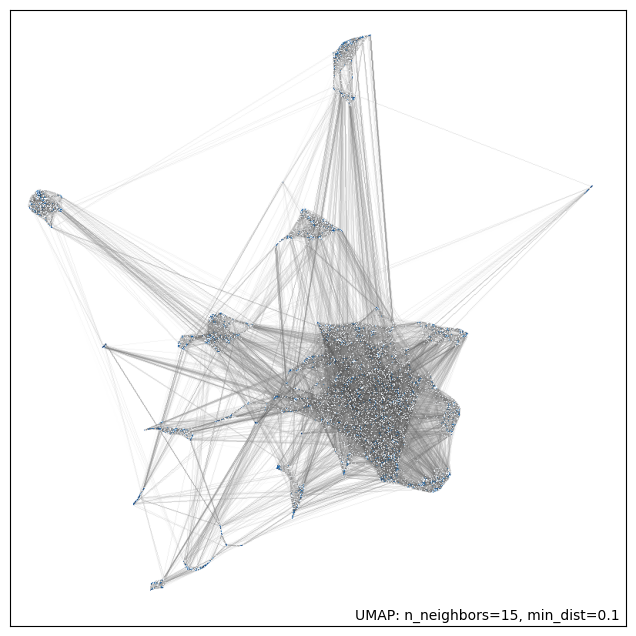

In [44]:
umap.plot.connectivity(mapper, show_points=True,)

/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/umap/plot.py:894: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

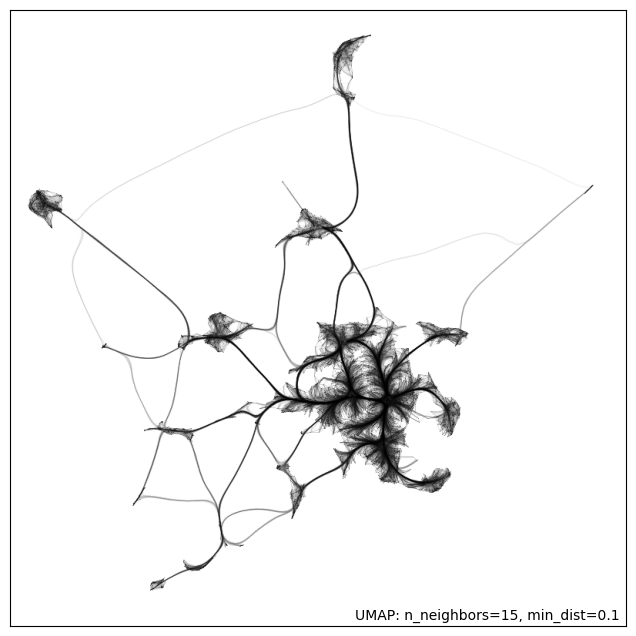

In [45]:
umap.plot.connectivity(mapper, edge_bundling="hammer")

In [46]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(all_samples_windows_average_df.dropna().transpose())

/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


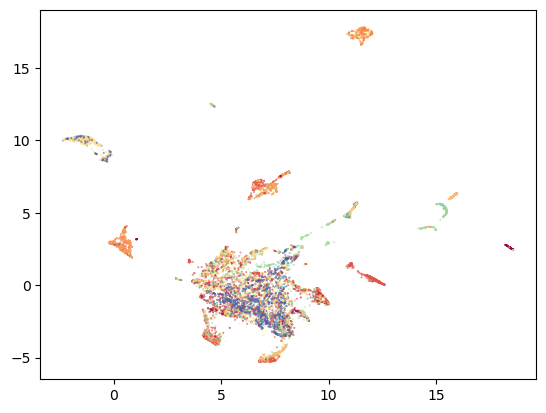

In [47]:
plt.scatter(
    clusterable_embedding[:, 0],
    clusterable_embedding[:, 1],
    c=all_samples_copy["project_color_id"],
    s=0.1,
    cmap="Spectral",
)

In [48]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

In [49]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(
    all_samples_windows_average_df.dropna().transpose()
)

/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


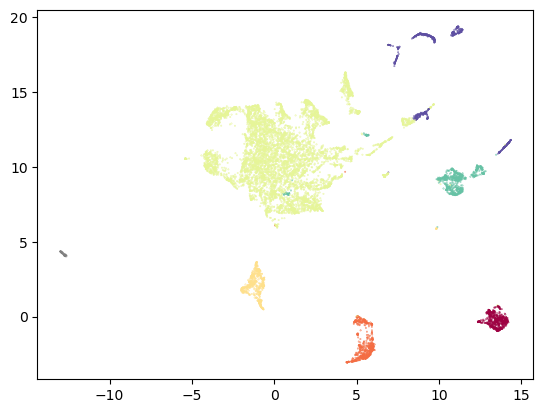

In [50]:
clustered = labels >= 0
fig, ax = plt.subplots()
ax.scatter(
    standard_embedding[~clustered, 0],
    standard_embedding[~clustered, 1],
    color=(0.5, 0.5, 0.5),
    s=0.1,
    alpha=0.5,
)
ax.scatter(
    standard_embedding[clustered, 0],
    standard_embedding[clustered, 1],
    c=labels[clustered],
    s=0.1,
    cmap="Spectral",
)

plt.show()

/tmp/ipykernel_433566/453172317.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(standard_embedding[i, 0], standard_embedding[i, 1], label=g, s=0.1, cmap="Spectral",)


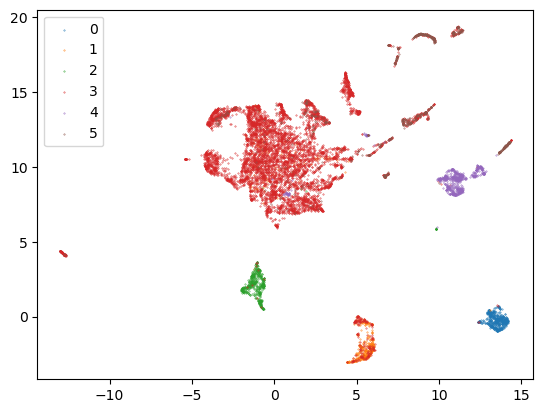

In [51]:
clustered = labels >= 0
fig, ax = plt.subplots()
ax.scatter(
    standard_embedding[~clustered, 0],
    standard_embedding[~clustered, 1],
    color=(0.5, 0.5, 0.5),
    s=0.1,
    alpha=0.5,
)
# for color in set(labels[clustered]):
#     ax.scatter([], [], label=color)
# ax.scatter(
#     standard_embedding[clustered, 0],
#     standard_embedding[clustered, 1],
#     c=labels[clustered],
#     s=0.1,
#     cmap="Spectral",
# )
for g in np.unique(labels[clustered]):
    i = np.where(labels[clustered] == g)
    ax.scatter(standard_embedding[i, 0], standard_embedding[i, 1], label=g, s=0.1, cmap="Spectral",)
ax.legend()
plt.show()

In [52]:
clustered

array([ True,  True,  True, ...,  True,  True,  True])

In [53]:
print(len(labels))

9714


In [54]:
all_samples_copy["group"] = labels

In [55]:
for group in all_samples_copy["group"].sort_values().unique():
    print(group)
    print(all_samples_copy.groupby("group")["project_descriptor"].get_group(group).unique())

-1
['Liver hepatocellular carcinoma' 'Lung adenocarcinoma'
 'Lung squamous cell carcinoma' 'Pheochromocytoma and Paraganglioma'
 'Prostate adenocarcinoma']
0
['Acute Myeloid Leukemia' nan 'Adrenocortical carcinoma'
 'Bladder Urothelial Carcinoma' 'Brain Lower Grade Glioma'
 'Colon adenocarcinoma' 'Esophageal carcinoma'
 'Head and Neck squamous cell carcinoma' 'Pancreatic adenocarcinoma'
 'Thyroid carcinoma']
1
['Skin Cutaneous Melanoma' 'Lung squamous cell carcinoma'
 'Stomach adenocarcinoma' 'Thymoma' 'Thyroid carcinoma'
 'Uterine Corpus Endometrial Carcinoma']
2
[nan 'Breast invasive carcinoma' 'Cholangiocarcinoma'
 'Colon adenocarcinoma' 'Glioblastoma multiforme'
 'Head and Neck squamous cell carcinoma'
 'Kidney renal clear cell carcinoma' 'Liver hepatocellular carcinoma'
 'Pheochromocytoma and Paraganglioma' 'Thymoma' 'Uveal Melanoma']
3
['Kidney renal clear cell carcinoma'
 'Kidney renal papillary cell carcinoma'
 'Pheochromocytoma and Paraganglioma' 'Testicular Germ Cell Tumors'


In [56]:
all_samples_copy.groupby("group")["project_descriptor"].get_group(0).unique()

array(['Acute Myeloid Leukemia', nan, 'Adrenocortical carcinoma',
       'Bladder Urothelial Carcinoma', 'Brain Lower Grade Glioma',
       'Colon adenocarcinoma', 'Esophageal carcinoma',
       'Head and Neck squamous cell carcinoma',
       'Pancreatic adenocarcinoma', 'Thyroid carcinoma'], dtype=object)